# Working with images

The images taken by the HRPO camera are stored in a file format widely used by astronomers called fits (Flexible Image Transport System). A basic fits image (they can get more complicated) consists of a header and a data segment. The header is stored as a series of 80 character wide rows. The data is just a 2-d array of numbers. In this notebook we'll explore some of the methods for reading, displaying, and manipulating fits image data.

To read fits images we will use the the `CCDData` class from astropy's nddata module. This reads the header as a dictionary object and the image data as a numpy 2d array. To display them we'll use a custom show image command that is contained in the hrpo-pipeline's aperturePhot module. The 

The first cell gets these packages up. To import aperturePhot, you'll need to tell the notebook where to find it by adding the hrpo-pipeline directory to your python path.

In [13]:
%matplotlib inline

import sys
sys.path.append('/home/idies/workspace/Storage/Dakota_Peltzer/persistent/hrpo-pipeline') #Change this so that it is your hrpo-pipeline directory.
import aperturePhot as ap

import numpy as np


from astropy.nddata import CCDData
import os
from pathlib import Path

from astropy import units as u


The next step is to move to the directory with your images (which you may need to put there anyway). You should first extract a set of images from the archive using the terminal. To do this, you'll use the `tar` command as so:
```
cd ~/workspace/Temporary/Dakota_Peltzer/scratch/
tar -xzf ~/workspace/Storage/penny1/HRPO_archive/20inch/2020/20200817.tar.gz
```
This will create a YYYYMMDD directory in your scratch directory. Note that this directory is temporary and could be deleted after as little as 24 hours, but in practice they usually last longer. It's important to use this directory for images so as not to use up the small amount of space in your persistent directory. Just remember to download anything you create in there and put it in a safe place.

Once that directory is created, you can tell the notebook to move to it:

In [11]:
os.chdir('/home/idies/workspace/Temporary/Dakota_Peltzer/scratch/20200817')

## Opening and inspecting fits file

The `read` method of `CCDData` can be used to read in a fits file and store it in an object. It's straightforward to use, the only snag you might encounter is that the package likes to know what units the data are in. The HRPO camera does not store this in the header by default, so you'll have to tell it using the `unit='adu'` keyword argument. Otherwise you'll get an error.

Once loaded, you can inspect the header using the newly created object's `.header` dictionary

You can access indivual header elements, e.g., `image.header['KEYWORD']` and even modify them or do math with the values they store.

To view the image, you can use the `ap.show_image(image)` method.

Go ahead and try these out. Don't forget you can use `help()` to get some guidance on what each thing does. It also doesn't hurt to use google to search for tutorials on e.g. astropy packages.

In [18]:
ccd = CCDData.read('Autosave Image -001B.fit', unit="adu")

In [19]:
ccd.header

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1024 /fastest changing axis                           
NAXIS2  =                 1024 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2020-08-18T03:26:50' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   60.000000000000000 /Exposure time in seconds                        
EXPOSURE=   60.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -19.969067250000002 /CCD temperature at start of exposure in C       
XPIXSZ  =   13.0000000000000

In [20]:
ccd.header['AIRMASS']

2.080223128647347

1058.746301651001 13.343399999999999
1023 1133.0621883170504


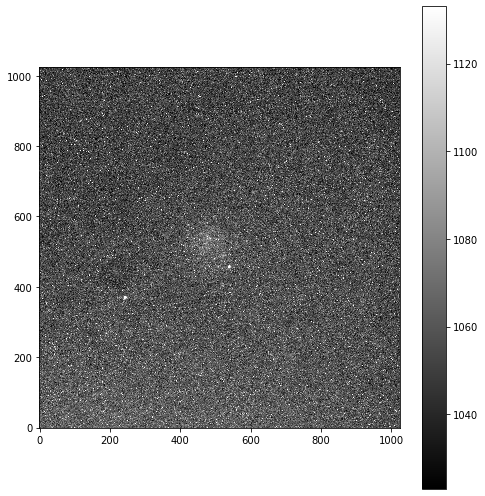

In [21]:
ap.showimage(ccd)

In [22]:
os.chdir('/home/idies/workspace/Temporary/Dakota_Peltzer/scratch/20220125')

dome_ccd = CCDData.read('Domeflat-002V.fit', unit="adu")

In [23]:
dome_ccd.header

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 1024 /fastest changing axis                           
NAXIS2  =                 1024 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2022-01-26T04:04:37' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   10.000000000000000 /Exposure time in seconds                        
EXPOSURE=   10.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -20.138802750000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   13.0000000000000

In [24]:
ccd.header['FILTER']

'Bessel B'

16220.007740974426 109.71239999999999
15702 16554


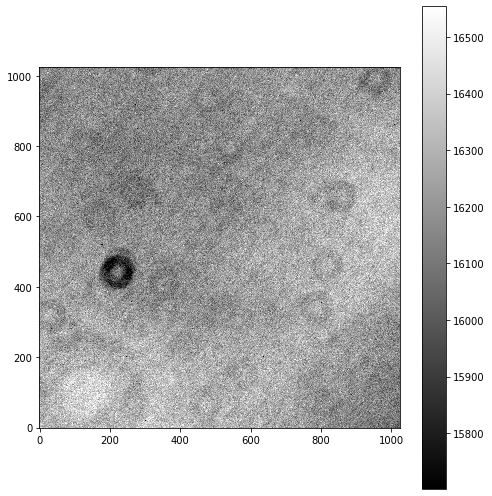

In [26]:
ap.showimage(dome_ccd)

In [27]:
dome_ccd.data

array([[16098, 16078, 16085, ..., 15952, 16096, 16011],
       [16151, 16261, 16234, ..., 16078, 15923, 16007],
       [16250, 16383, 16253, ..., 16049, 15906, 16048],
       ...,
       [16033, 16168, 16157, ..., 16093, 16208, 16156],
       [16082, 16068, 16089, ..., 16222, 16351, 16123],
       [16232, 15972, 16158, ..., 16249, 16204, 16107]], dtype=uint16)

In [45]:
dome_ccd2 = dome_ccd.data[400:500, 150:317]


16062.45285 167.53379999999999
15513 16514


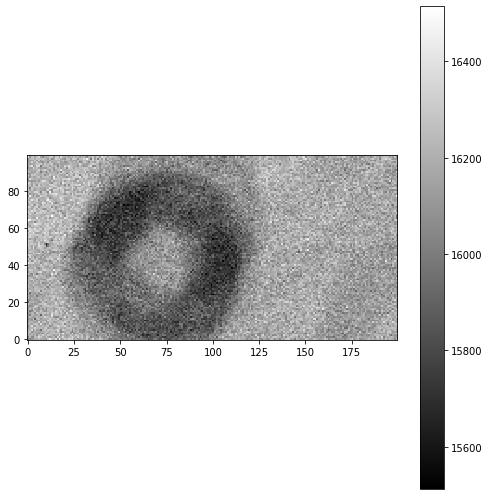

In [44]:
ap.showimage(dome_ccd2)

In [50]:
mean = np.mean(dome_ccd2)
median = np.median(dome_ccd2) 
min_val = np.min(dome_ccd2)
max_val = np.max(dome_ccd2)
std_dev = np.std(dome_ccd2)

print('mean: %s, median: %s, Minimum: %s, Maximum: %s, Standard deviation: %s' % (mean, median, min_val, max_val, std_dev))

mean: 16045.545568862275, median: 16077.0, Minimum: 15484, Maximum: 16524, Standard deviation: 178.81735878744632


In [ ]:
dome_ccd = CCDData.read('Domeflat-003V.fit', unit="adu")

In [ ]:
dome_ccd.header

In [ ]:
dome_ccd.data

In [ ]:
dome_ccd2 = dome_ccd.data[400:500, 150:317]

In [ ]:
ap.showimage(dome_ccd2)

In [ ]:
mean = np.mean(dome_ccd2)
median = np.median(dome_ccd2) 
min_val = np.min(dome_ccd2)
max_val = np.max(dome_ccd2)
std_dev = np.std(dome_ccd2)

print('mean: %s, median: %s, Minimum: %s, Maximum: %s, Standard deviation: %s' % (mean, median, min_val, max_val, std_dev))